# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# ChromeDriver Workaround
from webdriver_manager.chrome import ChromeDriverManager

executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)
executable_path

[WDM] - Downloading: 100%|████████████████████████████████████████████████████████| 6.30M/6.30M [00:00<00:00, 31.3MB/s]


{'executable_path': 'C:\\Users\\eacro\\.wdm\\drivers\\chromedriver\\win32\\114.0.5735.90\\chromedriver.exe'}

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
page = soup(html, 'html.parser')

In [5]:
# Extract all rows of data
rows = page.find_all('tr', class_='data-row')

# Display the extracted rows
rows

[<tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-22</td>
 <td>16</td>
 <td>158</td>
 <td>6</td>
 <td>-77.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>79</td>
 <td>2012-08-

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
results = []

# Iterate through rows to extract each data piece by finding 'td'
for row in rows:
    td_tags = row.find_all('td')
    
    # Define the datapoints
    id = td_tags[0].text
    terrestrial_date = td_tags[1].text
    sol = td_tags[2].text
    ls = td_tags[3].text
    month = td_tags[4].text
    min_temp = td_tags[5].text
    pressure = td_tags[6].text
    
    # Create a dictionary object of key-value pairs for each row
    row_data = {'id': id, 'terrestrial_date': terrestrial_date, 'sol': sol, 'ls': ls, 'month': month, 'min_temp': min_temp, 'pressure': pressure}
    
    # Append the results list with each key-value pair
    results.append(row_data)
    

In [7]:
# Display the list of dictionaries
results

[{'id': '2',
  'terrestrial_date': '2012-08-16',
  'sol': '10',
  'ls': '155',
  'month': '6',
  'min_temp': '-75.0',
  'pressure': '739.0'},
 {'id': '13',
  'terrestrial_date': '2012-08-17',
  'sol': '11',
  'ls': '156',
  'month': '6',
  'min_temp': '-76.0',
  'pressure': '740.0'},
 {'id': '24',
  'terrestrial_date': '2012-08-18',
  'sol': '12',
  'ls': '156',
  'month': '6',
  'min_temp': '-76.0',
  'pressure': '741.0'},
 {'id': '35',
  'terrestrial_date': '2012-08-19',
  'sol': '13',
  'ls': '157',
  'month': '6',
  'min_temp': '-74.0',
  'pressure': '732.0'},
 {'id': '46',
  'terrestrial_date': '2012-08-20',
  'sol': '14',
  'ls': '157',
  'month': '6',
  'min_temp': '-74.0',
  'pressure': '740.0'},
 {'id': '57',
  'terrestrial_date': '2012-08-21',
  'sol': '15',
  'ls': '158',
  'month': '6',
  'min_temp': '-78.0',
  'pressure': '740.0'},
 {'id': '68',
  'terrestrial_date': '2012-08-22',
  'sol': '16',
  'ls': '158',
  'month': '6',
  'min_temp': '-77.0',
  'pressure': '740.0'},


In [8]:
# Create a dataframe from the list
results_df = pd.DataFrame(results)

# Confirm DataFrame was created successfully
results_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
results_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Change data types for data analysis
results_df = results_df.astype(
    {'sol': 'int64',
     'ls':'int64',
     'month':'int64',
     'min_temp':'float64',
     'pressure':'float64'}
)


In [11]:
results_df['terrestrial_date'] = pd.to_datetime(results_df['terrestrial_date'], format = '%Y-%m-%d')

In [12]:
# Confirm type changes were successful by examining data types again
results_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [13]:
# 1. How many months are there on Mars?
result_months = results_df['month'].value_counts().sort_index()
result_months

1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [14]:
# 2. How many Martian days' worth of data are there?
result_days = results_df['terrestrial_date'].nunique()
print(result_days)

1867


In [15]:
# 3. What is the average low temperature by month?
result_avg_temp = results_df['min_temp'].groupby(results_df['month']).mean()
result_avg_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

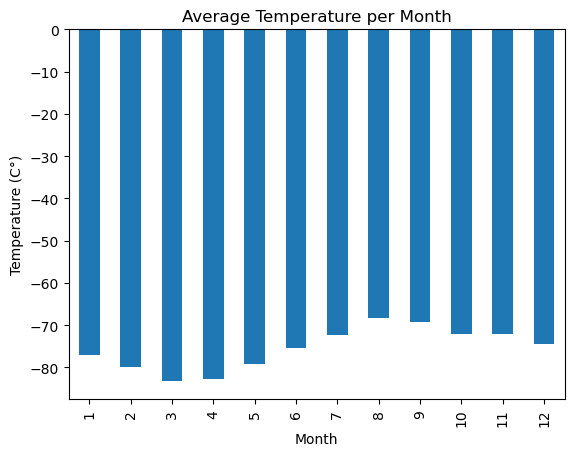

In [16]:
# Plot the average temperature by month
result_avg_temp.plot(
    kind = 'bar',
    ylabel = 'Temperature (C°)',
    xlabel = 'Month',
    title = 'Average Temperature per Month',
)

plt.show()

In [17]:
# Sort the DataFrame by X-axis values
result_avg_temp_sorted = result_avg_temp.sort_values(axis=0)

result_avg_temp_sorted

month
3    -83.307292
4    -82.747423
2    -79.932584
5    -79.308725
1    -77.160920
6    -75.299320
12   -74.451807
7    -72.281690
11   -71.985507
10   -71.982143
9    -69.171642
8    -68.382979
Name: min_temp, dtype: float64

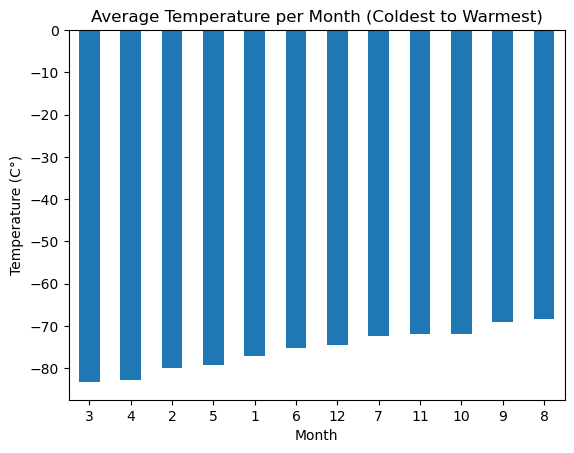

In [18]:
# Plot the sorted DataFrame
result_avg_temp_sorted.plot(
    kind='bar',
    ylabel = 'Temperature (C°)',
    xlabel = 'Month',
    title='Average Temperature per Month (Coldest to Warmest)',
    rot=0
)

plt.show()

In [19]:
# 4. Average pressure by Martian month
result_avg_pressure = results_df['pressure'].groupby(results_df['month']).mean()
result_avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

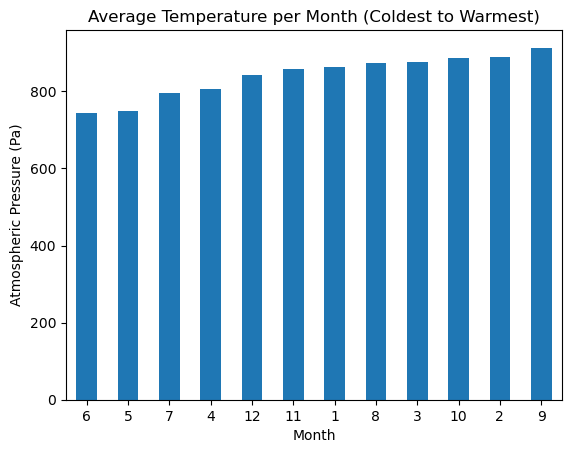

In [20]:
result_avg_pressure_sorted = result_avg_pressure.sort_values(axis=0)

# Plot the average pressure by month
result_avg_pressure_sorted.plot(
    kind='bar',
    ylabel = 'Atmospheric Pressure (Pa)',
    xlabel = 'Month',
    title='Average Temperature per Month (Coldest to Warmest)',
    rot=0
)

plt.show()

In [21]:
result_temp = pd.DataFrame(results_df['terrestrial_date'])
result_temp['min_temp'] = results_df['min_temp']
result_temp = result_temp.reset_index()
result_temp = result_temp.drop('terrestrial_date', axis=1)
result_temp

,index,min_temp
0,0,-75.0
1,1,-76.0
2,2,-76.0
3,3,-74.0
4,4,-74.0
...,...,...
1862,1862,-78.0
1863,1863,-77.0
1864,1864,-76.0
1865,1865,-77.0


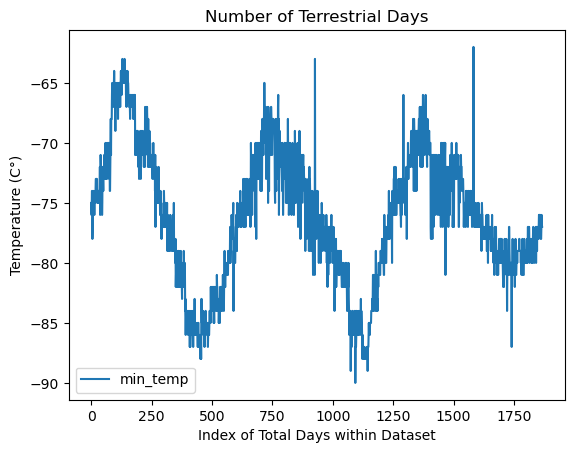

In [22]:
# 5. How many terrestrial (earth) days are there in a Martian year?
result_temp.plot(
    x ='index',
    y = 'min_temp',
    kind='line',
    ylabel = 'Temperature (C°)',
    xlabel = 'Index of Total Days within Dataset',
    title='Number of Terrestrial Days'
)


plt.show()

### Analysis

#### How many months exist on Mars?

According to the provided data, there are 12 months.


#### How many Martian (and not Earth) days worth of data exist in the scraped dataset?

In the the provided data, there are 1867 Martian days, referred to as "Sols". 


#### What are the coldest and the warmest months on Mars (at the location of Curiosity)?

Month 3 is the coldest, month 8 is the warmest. Temperatures on Mars are significantly colder than earth.

#### Which months have the lowest and the highest atmospheric pressure on Mars?

Month 6 recorded the lowest average atmospheric pressure at 745.05 Pa (Pascals) and Month 9 had the highest average at 913.3

#### About how many terrestrial (Earth) days exist in a Martian year?

The data shows roughly ~680 terrestrial days. There are 687 terrestrial days in a year on Mars. 


### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [25]:
# Write the data to a CSV
results_df.to_csv('Data/mars_data.csv', index=False)

In [26]:
browser.quit()